# Spectral clustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance when clusters are nested circles on the 2D plane.

![title](img/spectral.png)
credits to https://calculatedcontent.com/2012/10/09/spectral-clustering/

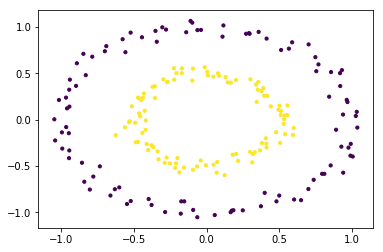

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

noisy_circles, noisy_circles_labels  = datasets.make_circles(n_samples=200, factor=.5,
                                      noise=.05)
#print(noisy_circles)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], s=10, c=noisy_circles_labels)

plt.show()

In [9]:
from sklearn.cluster import SpectralClustering


In [10]:
print(clustering)

SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=2, n_init=10, n_jobs=None,
          n_neighbors=10, random_state=0)


In [12]:
len(clustering.labels_)

200

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
          gamma=1.0, kernel_params=None, n_clusters=2, n_init=10,
          n_jobs=None, n_neighbors=10, random_state=None)


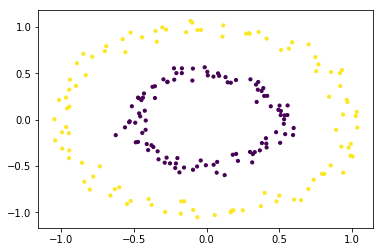

In [24]:
# affinity ‘nearest_neighbors’
clustering = SpectralClustering(n_clusters=2,eigen_solver='arpack',
        affinity="nearest_neighbors").fit(noisy_circles)
print(clustering)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], s=10, c=clustering.labels_)
plt.show()
#print(sklearn.metrics.accuracy_score(noisy_circles_labels, clustering.labels_), gamma, "Confusion matrix", sklearn.metrics.confusion_matrix(noisy_circles_labels, clustering.labels_))         
          
          

gamma= 5.0 ,error measure not involving true labels 113.47952800785234


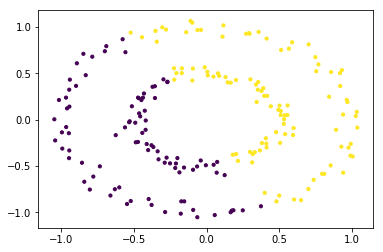

gamma= 253.75 ,error measure not involving true labels 0.0027102286980988403


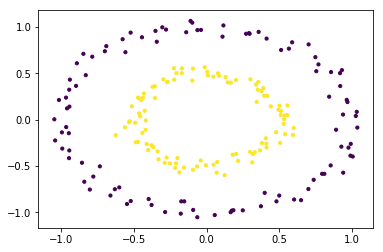

gamma= 502.5 ,error measure not involving true labels 55.122488011281696


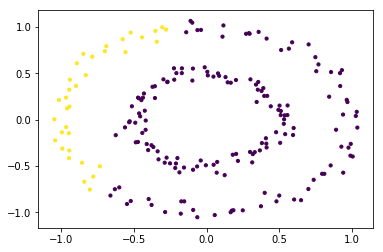

gamma= 751.25 ,error measure not involving true labels 2.9669763503923128


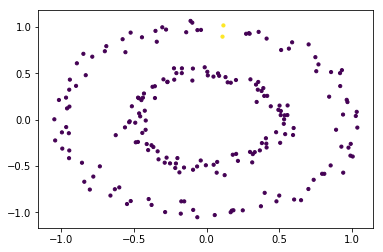

gamma= 1000.0 ,error measure not involving true labels 4.031718724978375


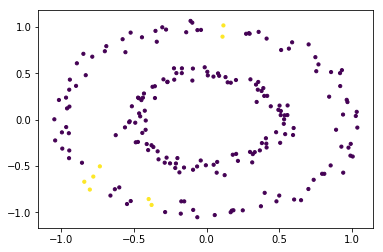

In [37]:
for g in np.linspace(5, 1000, 5):
    ### we need to search over gamma
    clustering = SpectralClustering(n_clusters=2,gamma = g, affinity = 'rbf', eigen_solver='arpack').fit(noisy_circles)
    plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], s=10, c=clustering.labels_)
    print('gamma=', g,",error measure not involving true labels", sklearn.metrics.calinski_harabaz_score(noisy_circles, clustering.labels_))
    
    plt.show()

### Understanding the algorithm:
http://ai.stanford.edu/~ang/papers/nips01-spectral.pdf

### On choosing sigma:

![title](img/sigma.png)


### Learning Affinity Matrix from the data

It is possible to learn Affinity Matrix from data, see Learning Spectral Clustering by Bach and Jordan http://www.di.ens.fr/~fbach/nips03_cluster.pdf 